
# G2Net Detecting Continuous Gravitational Waves

## Help us detect long-lasting gravitational-wave signals!

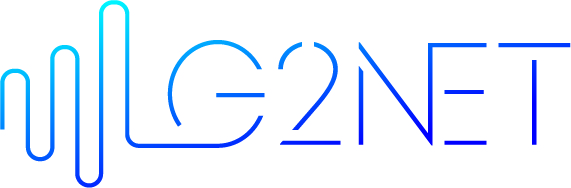

    The goal is to find continuous gravitational-wave signals. To develop a model sensitive enough to detect weak yet long-lasting signals emitted by rapidly-spinning neutron stars within noisy data.

## How to generate continuous gravitational-wave signals

This notebook presents an introduction on generating your very own set of continuous gravitational-wave signals (CWs).

With the help of discussion on how to generate continuous waves provided by kaggle, install PyFstat.  [the PyFstat tutorials](https://www.kaggle.com/competitions/g2net-detecting-continuous-gravitational-waves/discussion/347052) for a more in-depth introduction to the topic.

Steps involed in generating the continuous gravtational waves.

1. Specifing [Parameters](#1)
2. [Generating data](#2)
3. [Generating specific frequency bands](#3)

### Installing the PyFast library.

PyFstat is widely used in the gravitational wave research community for searching for continuous gravitational wave signals from rotating neutron stars, as well as for other applications in astrophysics and fundamental physics.

PyFstat is a Python package for performing fully coherent searches for continuous gravitational waves in data from ground-based gravitational wave detectors. It is built on top of the F-statistic formalism, which is a powerful statistical method for detecting signals buried in noise.

In [1]:
# Do use the latest version of PyFstat if you use your own Python >= 3.8 installation.

!pip install git+https://github.com/PyFstat/PyFstat@python37

  Cloning https://github.com/PyFstat/PyFstat (to revision python37) to /tmp/pip-req-build-en_7lc_h
  Running command git clone --filter=blob:none --quiet https://github.com/PyFstat/PyFstat /tmp/pip-req-build-en_7lc_h
  Running command git checkout -b python37 --track origin/python37
  Switched to a new branch 'python37'
  Branch 'python37' set up to track remote branch 'python37' from 'origin'.
  Resolved https://github.com/PyFstat/PyFstat to commit 73ad1acdc9385a234727abf3eb9f93c9298fc5e5
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 444.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 38.7 MB/s eta 0:00:00
  Installing build dependencies ... - \ |

## Importing the required libraries.

In [2]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

import pyfstat

from scipy import stats

%matplotlib inline

<a id="1"></a> <br>
# 1. Parameters

Standard Continuous Wave signals can be parameterised in two sets of parameters: 
1. Doppler-modulation parameters $\lambda$ and 
2. Amplitude parameters $\mathcal{A}$.

The Doppler-modulation parameters descibes how the frequency of a signal modulates due to its intrinsic frequency evolution and the movement of the Earth in the Solar system, 
while the latter describes the amplitude of a CW depending on the parameters of the source.

For a CW emmitted by a rapidly-spinning and isolated neutron star (NS),

##### 1.1 Doppler-modulation parameters include:
(i)   frequency `F0` and 
(ii)  linear spindown parameter `F1`,
(iii) both taken at a reference time `tref`, and 
(iv)  sky position in terms of the right ascension `Alpha` and 
(v)   declination `Delta` angles of equatorial cordinates. 


##### 2.1 Amplitude parameters include:
(i)   average amplitude of a CW signal `h0`, 
(ii)  initial phase of the signal `phi`,
(iii) polarization angle `psi`and 
(iv)  inclination angle of the source `cosi`(the cosine of), which gives us the relative orientation of the NS with respect to the detector.


##### Math Expression and formula.
As described in [the signal tutorial](https://github.com/PyFstat/PyFstat/blob/master/examples/tutorials/1_generating_signals.ipynb),

The amplitude of a CW signal is usually expressed in terms of the noises's amplitude using depth $\mathcal{D}$ or signal-to-noise ratio (SNR) $\rho$.

For our purposes, the former is essentially a quotient
$$
\mathcal{D} = \frac{\sqrt{S_{\mathrm{n}}}}{h_0}
$$

while the latter is a more involved expression which also depends on the duration of the dataset at hand and the detector's response function.

It is important to note, however, that $\rho$ and $\mathcal{D}$ scale reciprocally: 
"weak" signals have a *low* SNR and a *high* depth (since they are "buried deeper into the noise" than a strong signal).

<a id="2"></a> <br>
# 2. Generating data

A specific sample requires of background noise and optionally a signal. 
In order to generate noise, one needs to specify a set of `detectors` (`H1` or `L1` in this case), the duration of the sample and the Amplitude Spectral Density of the noise `sqrtSX`. 
CW analyses are simple in this front, as `sqrtSX` is proportional to the (stationary) standard deviation of an underlying zero-mean Gaussian process.

Sample duration can be specified in two ways. If the sample contains contiguous data (i.e. the detector was taking science-quality data uninterrupted), one can simply specify the starting time and duration of the sample using `tstart` and `duration`. Data with gaps, on the other hand, can be generated by specifying a specific set of timestamps using the `timestamps` option.

Data is saved as a list of Short Fourier Transforms (SFTs). The duration and windowing of these SFTs can also be modified using `Tsft`, `SFTWindowType` and `SFTWindowBeta`.
Most analyses tune `Tsft` around 1800 seconds order to ensure the power of a putative CW signal stays within a bin.

## 2.1 Generating Noise 

CODE DESCRIPTION TO DESCRIBE NOISE.

"tstart": 1238166018: tstart is a Unix timestamp (the number of seconds since January 1, 1970 UTC) representing the start time of a data-taking run.

"duration": 4 * 30 * 86400: duration is the duration of the data-taking run, in seconds. Here, it is set to 4 months (30 days per month) in seconds.

"detectors": "H1,L1": detectors is a string specifying the gravitational wave detectors used in the data-taking run. Here, it is set to the LIGO Hanford and LIGO Livingston detectors.

"sqrtSX": 1e-23: sqrtSX is the target sensitivity of the data-taking run, in units of strain per root hertz. Here, it is set to 10^-23 strain/rootHz.

"Tsft": 1800: Tsft is the length of each segment of data that is analyzed at one time, in seconds. Here, it is set to 1800 seconds, or half an hour.

"SFTWindowType": "tukey": SFTWindowType is the type of windowing function that is applied to each segment of data before analysis. Here, it is set to the Tukey window.

"SFTWindowBeta": 0.01: SFTWindowBeta is a parameter that controls the shape of the Tukey window. Here, it is set to 0.01, which corresponds to a relatively gradual tapering of the window.


## 2.2 Generating Wave

###### Code Discription on wave generation.

1. using Doopler modulation generator.
 This code defines a generator object signal_parameters_generator from the AllSkyInjectionParametersGenerator class in the PyFstat package.

The generator object is used to create a set of signal parameters for a gravitational wave signal that is being searched for in data. 

##### The parameters that are being varied are:

The gravitational wave frequency (F0),

its first derivative (F1), and 

its second derivative (F2), 

the amplitude of the signal (h0) and

the reference time (tref) for the signal.

##### The prior distributions for the parameters are specified using Python dictionaries and functions. 

The tref parameter is fixed to a specific value (writer_kwargs["tstart"]). 
The F0 parameter has a narrow uniform prior centered around 100 Hz, 
F1 has a prior that follows a *logarithmic distribution* with a range spanning several orders of magnitude.
The F2 parameter is set to 0, indicating that it is *not being varied in this search*.

The amplitude of signal, h0, has a prior distribution that is proportional to the inverse of a uniform distribution spanning the range 1 to 10. 

Finally, the isotropic_amplitude_priors dictionary from the pyfstat.injection_parameters module is included to specify additional prior distributions for the amplitude of the signal, based on the source's position on the sky.

#####  CODE DESCRIPTION  ON WAVE GENERATOR.

This code block is using the AllSkyInjectionParametersGenerator class from the pyfstat package to generate a dictionary of parameters that describe a gravitational wave signal.

The priors dictionary specifies the prior distributions to use when generating each parameter. The parameters being generated are:

tref: the reference time for the signal, which is set to writer_kwargs["tstart"]
F0: the gravitational wave frequency, which is drawn from a uniform distribution between 100.0 and 100.1 Hz

F1: the first derivative of the gravitational wave frequency, which is drawn from a uniform-in-logarithm distribution between 10^-12 and 10^4 Hz/s

F2: the second derivative of the gravitational wave frequency, which is set to 0

h0: the strain amplitude of the gravitational wave, which is drawn from a distribution that is inversely proportional to a uniform distribution between 1 and 10 times the square root of the detector noise power spectral density (writer_kwargs["sqrtSX"])

The **pyfstat.injection_parameters.isotropic_amplitude_priors part of the priors dictionary includes additional priors on the amplitude parameters that are specific to isotropic gravitational wave sources.


## 2.3 Generating and Recordging data for a PyFstat  ensemble.

signal_parameters_generator.draw() is likely a function that generates a set of signal parameters (e.g. frequency, amplitude, phase) for a gravitational wave signal.

writer_kwargs is a dictionary containing keyword arguments that will be passed to the pyfstat.Writer object when it is instantiated. It looks like outdir and label are being set here.

pyfstat.Writer(**writer_kwargs, **params) creates a pyfstat.Writer object with the writer_kwargs and params dictionaries unpacked as keyword arguments.

writer.make_data() generates and writes the gravitational wave data to the specified directory (outdir) with the specified label (label).

Overall, this code appears to be generating and writing multiple sets of gravitational wave data to separate directories with unique labels, likely for use in testing or analysis.

## 2.4 Computing the Signal to Noise Ratio

The SNR value is an important metric in determining the significance of a gravitational wave candidate.

Using the pyfstat library to compute the signal-to-noise ratio (SNR) of a gravitational wave signal from a set of SFT files.

SignalToNoiseRatio.from_sfts() method creates a new SignalToNoiseRatio object by reading in the data from the SFT files specified by the sftfilepath argument. The F0 argument is the central frequency of the signal.

compute_snr2() method of the SignalToNoiseRatio object computes the square of the SNR for a given set of source parameters (Alpha, Delta, psi, phi, h0, and cosi). The resulting squared SNR is then square-rooted and stored in the snrs array at index ind.

Overall, this code appears to be part of a larger program or script that is performing some kind of analysis or search for gravitational waves.



## 2.5  Visualizing the GW signal

To generate a visualization of a gravitational wave signal detected by multiple detectors.

get_sft_as_arrays function is called to extract these arrays from a SFT (short Fourier transform) file specified by writer.sftfilepath.

The first line extracts three arrays from a spectral density file using the PyFstat package. These arrays contain the frequency values, timestamps, and amplitudes (real and imaginary parts) of the signal for each detector.

The following lines create a 2x2 grid of plots using Matplotlib. The title of the figure indicates the signal number and its signal-to-noise ratio. The two outer loops iterate over the detectors, setting the x and y labels and titles for each subplot.

The pcolormesh() function is then used to create a color plot of the real and imaginary parts of the amplitudes for each detector. The fig.colorbar() function adds a colorbar to each subplot to indicate the amplitude values. Finally, plt.show() is used to display the plot.

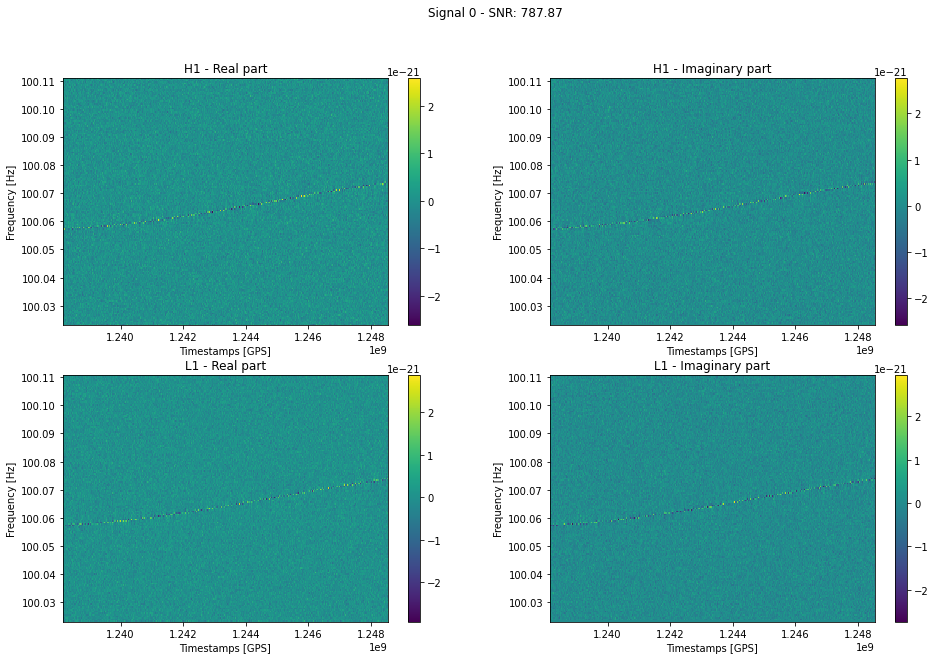

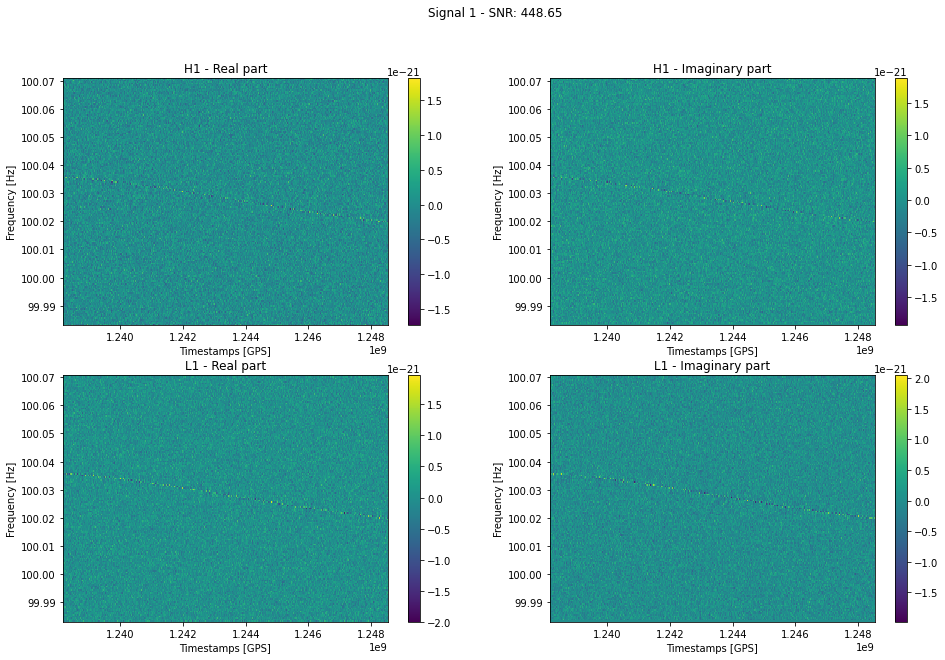

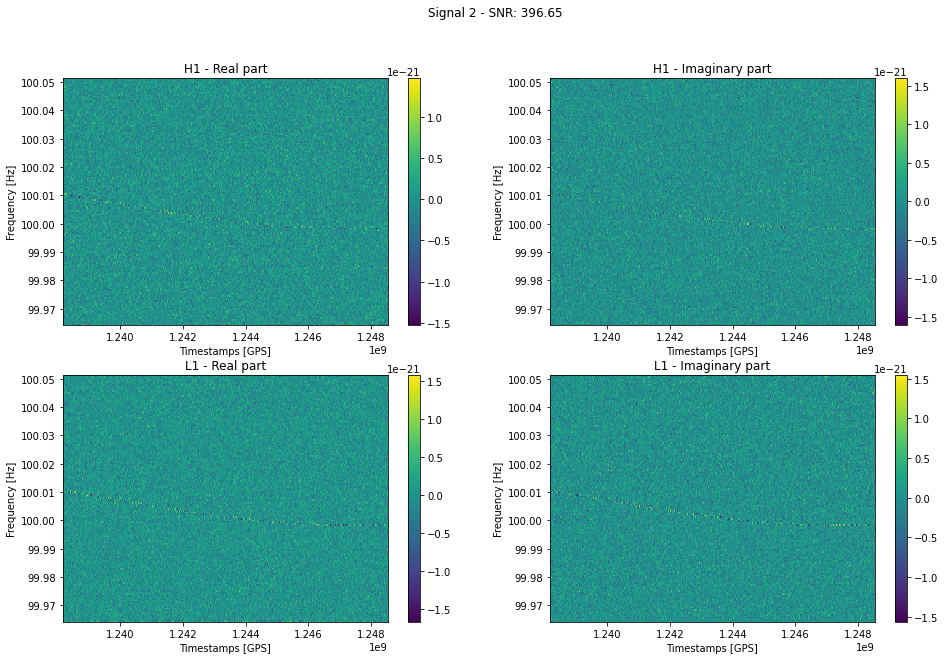

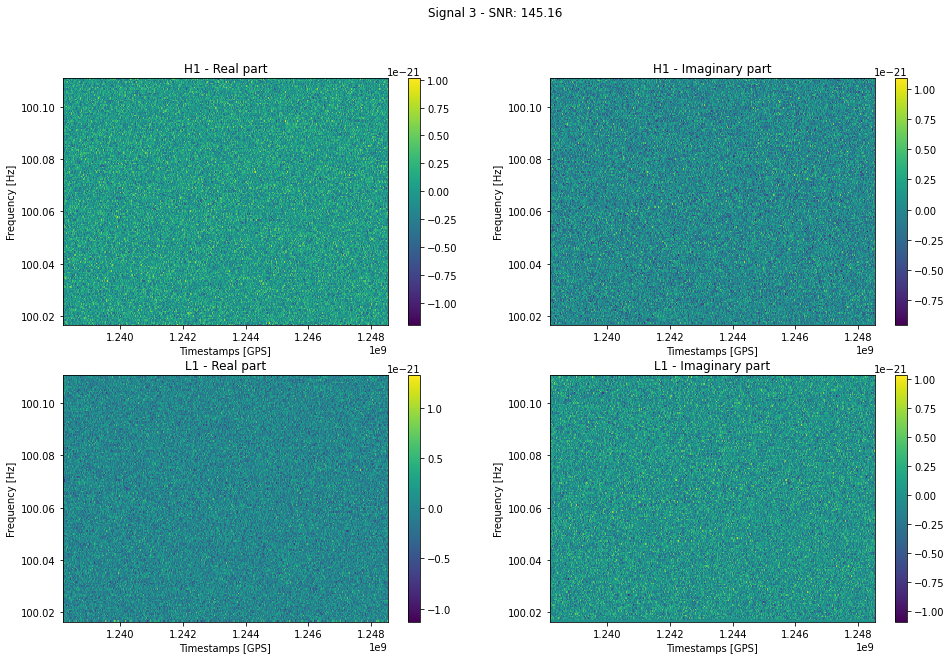

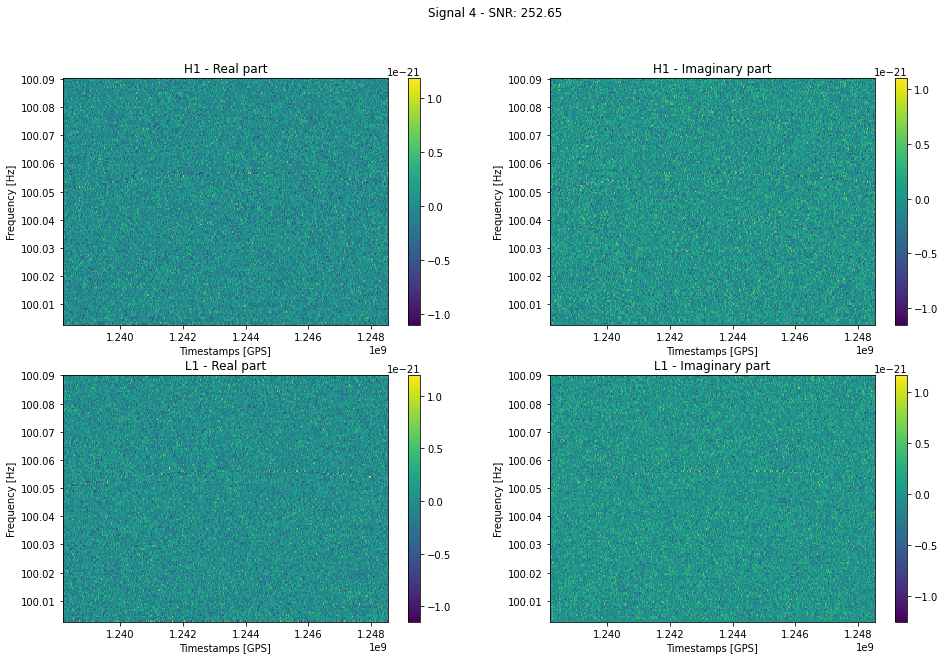

In [3]:
# Generate signals with parameters drawn from a specific population
num_signals = 5

# These parameters describe background noise and data format
writer_kwargs = {
                "tstart": 1238166018,  #representing the start time of a data-taking run.
                "duration": 4 * 30 * 86400,  
                "detectors": "H1,L1",        
                "sqrtSX": 1e-23,          
                "Tsft": 1800,             
                "SFTWindowType": "tukey", 
                "SFTWindowBeta": 0.01,
               }

# This class allows us to sample signal parameters from a specific population.
# Implicitly, sky positions are drawn uniformly across the celestial sphere.
# PyFstat also implements a convenient set of priors to sample a population
# of isotropically oriented neutron stars.

signal_parameters_generator = pyfstat.AllSkyInjectionParametersGenerator(
    priors={
        "tref": writer_kwargs["tstart"],
        "F0": {"uniform": {"low": 100.0, "high": 100.1}},
        "F1": lambda: 10**stats.uniform(-12, 4).rvs(),
        "F2": 0,
        "h0": lambda: writer_kwargs["sqrtSX"] / stats.uniform(1, 10).rvs(),
        **pyfstat.injection_parameters.isotropic_amplitude_priors,
    },
)

snrs = np.zeros(num_signals)

for ind in range(num_signals):

    # Draw signal parameters.
    # Noise can be drawn by setting `params["h0"] = 0
    params = signal_parameters_generator.draw()
    writer_kwargs["outdir"] = f"PyFstat_example_data_ensemble/Signal_{ind}"
    writer_kwargs["label"] = f"Signal_{ind}"
    
    writer = pyfstat.Writer(**writer_kwargs, **params)
    writer.make_data()
    
    # SNR can be compute from a set of SFTs for a specific set
    # of parameters as follows:
    snr = pyfstat.SignalToNoiseRatio.from_sfts(
        F0=writer.F0, sftfilepath=writer.sftfilepath
    )
    squared_snr = snr.compute_snr2(
        Alpha=writer.Alpha, 
        Delta=writer.Delta,
        psi=writer.psi,
        phi=writer.phi, 
        h0=writer.h0,
        cosi=writer.cosi
    )
    snrs[ind] = np.sqrt(squared_snr)
    
    # Data can be read as a numpy array using PyFstat
    frequency, timestamps, amplitudes = pyfstat.utils.get_sft_as_arrays(
        writer.sftfilepath
    )
    
    fig, ax = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle(f"Signal {ind} - SNR: {snrs[ind]:.2f}")
    for d_ind, detector in enumerate(amplitudes.keys()):
        ax[d_ind][0].set(xlabel="Timestamps [GPS]",
                         ylabel="Frequency [Hz]",
                         title=f"{detector} - Real part")
        ax[d_ind][1].set(xlabel="Timestamps [GPS]",
                         ylabel="Frequency [Hz]",
                         title=f"{detector} - Imaginary part")
        
        c0 = ax[d_ind][0].pcolormesh(timestamps[detector], frequency,
                                     amplitudes[detector].real)
        c1 = ax[d_ind][1].pcolormesh(timestamps[detector], frequency,
                                     amplitudes[detector].imag)
        
        fig.colorbar(c0, ax=ax[d_ind][0])
        fig.colorbar(c1, ax=ax[d_ind][1])
    plt.show()

## Intrepretation of Graph.

1. In the signal Graph, we can observe the 5 different signal with SNR and their real and imaginary wave of H1 and L1.

2. I can observe that, as the SNR keeps decreasing the depth gets increasing.

3. Look signal 0: 787.87 - high signal to noise ratio so low depth (signal is not buried deep into the noise. you can cleary trace the signal wave.)

4. On other Hand,refer Signal 3:145.16- low SNR leads to high depth. so signal is buried deep into the noise. you can't trace the wave.
"weak" signals have a low SNR and a high depth (since they are "buried deeper into the noise" than a strong signal).

5. Therefore signal:3 is a weak signal so it can't display the wave in the midst of noise , whereas Signal 0 is the strong signal so it displays the signal wave in misdt of the noise.


<a id="3"></a> <br>
# 3. Generating specific frequency bands

The `pyfstat.Writer` class generates CW signals following the conventions used by LIGO data-analysis codes; more specifically, frequency bands are always made wide enough so that any requested CW signal can fit into it and there are enough extra bins to compute running quantities. This may be a problem, as in some cases data with a very specific frequency band may need to be generated.

A simple way to generate specific output would be to generate a broad SFT and slice the frequency band of interest whenever reading as a numpy array.
This can be done as follows (taken from [this conversation with DennisSakva](https://www.kaggle.com/competitions/g2net-detecting-continuous-gravitational-waves/discussion/347052#1986395):

1. Use `Writer` to generate noise-only SFTs, using Band and F0 to specify a broad frequency band [F0 - Band/2, F0 + Band/2]
2. Use another `Writer` to inject a signal in the previous SFTs via the `noiseSFTs` option. This will return the same band as the original SFTs.
3. Read into numpy array and select the band of interest

Below there is an example to generate a signal within the [150., 150.2) Hz band:

## 3.1 Generating SFTs noise by covering the band of interest

#### What is SFTs?
    SFT analysis is a common technique used in the search for gravitational waves, and is used by a number of different experiments and collaborations, including LIGO, Virgo, and GEO.

#### Steps to generate SFTs with band of interest
Defining a dictionary called noise_kwargs which contains several key-value pairs.Among them the most important key value is band . in previous noise noise genrating process we won't use band.

Now we are using bandwidth of the frequency according to our interest to noise generation.

"Band" is the bandwidth of the frequency band that you want to generate noise for.
we have set our Band value is only 0.5 Hz, so the frequency band is too narrow to contain any signals.
"Band": The width (in Hz) of the frequency band used to generate the data.

Overall, we are using these parameters to generate some kind of synthetic noise data. recording the noise signal when the bandwidth is specified.

## 3.2 Injecting noise to the signal.

#### Steps to inject the noise in signal.

1. By Creating a dictionary called signal_kwargs is defined with several key-value pairs that are likely related to the signal parameters, including a file path for some kind of noise data, the gravitational wave frequency and frequency derivative, sky position, amplitude, and polarization angle.

    The first part of the code block, which creates a dictionary called signal_kwargs and then updates it using values from another dictionary called noise_kwargs, seems to be related to setting up the simulation and writing the output data to a file.

2. Next, a for loop is used to update the signal_kwargs dictionary with values from another dictionary called noise_kwargs for the keys "SFTWindowType" and "SFTWindowBeta".

    The second part of the code block starts by using the pyfstat.utils.get_sft_as_arrays function to extract the frequency, time, and data arrays from the output file that was created in the previous step.

3. Then, an object of type pyfstat.Writer is created with the label "custom_band_signal" and the signal_kwargs dictionary is passed as keyword arguments using the double-asterisk syntax.

    The make_data() method is then called on the signal_writer object to generate the gravitational wave signal data.




## 3.3 Slicing the frequency band of interest .

Slicing out a frequency band of interest from some gravitational wave signal data.

The np.argmin function is then used twice to find the indices of the frequency array that are closest to 150 Hz and 150.2 Hz, respectively. These indices are used to slice out the portion of the frequency array that corresponds to the desired frequency band.

Finally, the frequency range of interest is defined by selecting the closest frequency bin to the desired frequency range, and the amplitude of the signal is sliced out using the get_sft_as_arrays function from the pyfstat.utils module.

The freqs variable at the end of the code block contains the frequencies in the frequency range of interest.

In [4]:
# Generate SFTs noise-only SFTs covering the band of interest
noise_kwargs = {
    "tstart": 1238166018,
    "duration": 4 * 30 * 86400,
    "sqrtSX": 1e-23,
    "detectors": "H1,L1",
    "Tsft": 1800,
    "F0": 150.1, # No signals: [F0 - Band/2, F0 + Band/2]
    "Band": 0.5, 
    "SFTWindowType": "tukey",
    "SFTWindowBeta": 0.001,
}

noise_writer = pyfstat.Writer(label="custom_band_noise", **noise_kwargs)
noise_writer.make_data()

# Inject signal into noise SFTs. Note the lack of `Band` argument.
signal_kwargs = {
        "noiseSFTs": noise_writer.sftfilepath,
        "F0": 150.15,
        "F1": 1e-8,
        "Alpha": 0.3,
        "Delta": 0,
        "h0": 1e-23/10,
        "cosi": 1,
        "psi": 0.2,
        "phi": 0.
        }
for key in ["SFTWindowType", "SFTWindowBeta"]:
    signal_kwargs[key] = noise_kwargs[key]

signal_writer = pyfstat.Writer(label="custom_band_signal", **signal_kwargs)
signal_writer.make_data()

# Slice out the band of interest
freqs, times, sft_data = pyfstat.utils.get_sft_as_arrays(signal_writer.sftfilepath)

first_index = np.argmin(np.abs(freqs - 150.))
last_index = np.argmin(np.abs(freqs - 150.2))

freqs = freqs[first_index:last_index+1]
amplitudes = {key: val[first_index:last_index + 1, :]
        for key, val in sft_data.items()}

freqs

array([150.        , 150.00055556, 150.00111111, 150.00166667,
       150.00222222, 150.00277778, 150.00333333, 150.00388889,
       150.00444444, 150.005     , 150.00555556, 150.00611111,
       150.00666667, 150.00722222, 150.00777778, 150.00833333,
       150.00888889, 150.00944444, 150.01      , 150.01055556,
       150.01111111, 150.01166667, 150.01222222, 150.01277778,
       150.01333333, 150.01388889, 150.01444444, 150.015     ,
       150.01555556, 150.01611111, 150.01666667, 150.01722222,
       150.01777778, 150.01833333, 150.01888889, 150.01944444,
       150.02      , 150.02055556, 150.02111111, 150.02166667,
       150.02222222, 150.02277778, 150.02333333, 150.02388889,
       150.02444444, 150.025     , 150.02555556, 150.02611111,
       150.02666667, 150.02722222, 150.02777778, 150.02833333,
       150.02888889, 150.02944444, 150.03      , 150.03055556,
       150.03111111, 150.03166667, 150.03222222, 150.03277778,
       150.03333333, 150.03388889, 150.03444444, 150.03

## Result.

The continuous gravitational waves are generated to the band width of 0.5 HZ.so we can observe,that the frequency lies between the range 150 to 150.2 for the 0.5 HZ of bandwidth.